# Binomial and Trinomial Model





**Name:** Bowen Chen

**Section:** 1

**Date:** Feb 3, 2018 

In [698]:
# python set up
import matplotlib.pyplot as plt
from matplotlib import style
import math as m
import numpy as np
import pandas_datareader.data as data
import pandas as pd
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

## Question 1

Compare the convergence rates of the four methods below by doing the following:
Use the Binomial Method to price a 6-month European Call option with the following information: the
risk-free interest rate is 5% per annum and the volatility is 24%/annum, the current stock price is \\$ 32 and
the strike price is $30. Divide the time interval into n parts to estimate the price of this option. Use
n = 10, 20, 40, 80, 100, 200, and 500 to estimate the price and draw them all in one graph, where the
horizontal axis measures 𝑛, and the vertical one the price of the option.



**Solution: **

Define parameters

In [699]:
r = 0.05
sd = 0.24
S0 = 32
K = 30
T = 0.5

n = [10, 20, 40, 80, 100, 200, 500]

The parameters u and d are verified to satisfy the necessary condition of binomial option pricing, $d < e^{r\Delta} < u$ 

Construct a function that prices 6-month European option with the given set of parameters 

In [700]:
def stockBinomial(u, d, S0, n):
    
    stockT = [np.array([S0])] 
    
    for i in range(n):
        current_S = stockT[-1]
        stockt = np.concatenate((current_S*u, [current_S[-1]*d]))
        stockT.append(stockt)
            
    return stockT[-1]

In [701]:
def EuropeanCallOption(u, d, p, r, S0, T, K, n):
    
    dt = T/n
    # build stock tree and payoff tree
    S_binomial = stockBinomial(u, d, S0, n)
    
    # initialize payoffs
    payoffs = np.maximum(S_binomial - K, 0)

    # find the call option value  
    for i in range(n):
        payoffs = (payoffs[:-1] * p + payoffs[1:] * (1 - p))/(m.exp(r*dt))
            
    return payoffs[0]
    

**(a) Use the binomial method in which**

$u = \frac{1}{d}$, $ d =c - \sqrt{c^2 - 1} $, $c = \frac{1}{2}(e^{-r\Delta} + e^{(r+ \sigma^2)\Delta})$, $p = \frac{e^{r\Delta } - d}{u - d}$

In [702]:
def get_parameters_a(r, sd, n, T):
    
    dt = T/n
    c = (1/2)*(m.exp(-r*dt) + m.exp((r + sd**2)*dt))
    d = c - m.sqrt(c**2 - 1)
    u = 1/d
    
    p = (m.exp(r*dt) - d)/(u - d)
    
    return u, d, p, n

In [703]:
a_parameters = [get_parameters_a(r, sd, n, T) for n in n]
a_call_values = [EuropeanCallOption(i[0], i[1], i[2], r, S0, T, K, i[3]) for i in a_parameters]

**(b) Use the binomial method in which **

$u = e^{r \Delta} (1 + \sqrt{e^{\sigma^2\Delta} - 1})$,  $d = e^{r \Delta} (1 - \sqrt{e^{\sigma^2\Delta} - 1})$,  $p = \frac{1}{2}$

In [704]:
def get_parameters_b(r, sd, n, T):
    
    dt = T/n
    
    u = m.exp(r*dt)*(1 + m.sqrt(m.exp(sd**2 * dt) - 1))
    d = m.exp(r*dt)*(1 - m.sqrt(m.exp(sd**2 * dt) - 1))
    
    p = 1/2
    
    return u, d, p, n

In [705]:
b_parameters = [get_parameters_b(r, sd, n, T) for n in n]
b_call_values = [EuropeanCallOption(i[0], i[1], i[2], r, S0, T, K, i[3]) for i in b_parameters]

**(c) Use the binomial method in which**

$u = e^{(r - \frac{1}{2}\sigma^2)\Delta + \sigma\sqrt{\Delta}} $, $d = e^{(r - \frac{1}{2}\sigma^2)\Delta - \sigma\sqrt{\Delta}} $, $p = \frac{1}{2}$ 

In [706]:
def get_parameters_c(r, sd, n, T):
    
    dt = T/n
    
    u = m.exp((r - 0.5*sd**2)*dt + sd*m.sqrt(dt))
    d = m.exp((r - 0.5*sd**2)*dt - sd*m.sqrt(dt))
    
    p = 1/2
    
    return u, d, p, n

In [707]:
c_parameters = [get_parameters_c(r, sd, n, T) for n in n]
c_call_values = [EuropeanCallOption(i[0], i[1], i[2], r, S0, T, K, i[3]) for i in c_parameters]

**(d) Use the binomial method in which**

$u = e^{ \sigma\sqrt{\Delta}}$, $d =  e^{ -\sigma\sqrt{\Delta}}$, $p = \frac{1}{2} + \frac{1}{2}\bigg(\frac{(r - \frac{1}{2}\sigma^2)\sqrt{\Delta} }{\sigma}\bigg)$

In [708]:
def get_parameters_d(r, sd, n, T):
    
    dt = T/n
    
    u = m.exp(sd*m.sqrt(dt))
    d = m.exp(- sd*m.sqrt(dt))
    
    p = 1/2 + (1/2)*((r - 0.5*sd**2)*m.sqrt(dt) / sd)
    
    return u, d, p, n

In [709]:
d_parameters = [get_parameters_d(r, sd, n, T) for n in n]
d_call_values = [EuropeanCallOption(i[0], i[1], i[2], r, S0, T, K, i[3]) for i in d_parameters]

**Plot the option values evaluated by these 4 different schemes**

In [710]:
a = zip(n, a_call_values)
b = zip(n, b_call_values)
c = zip(n, c_call_values)
d = zip(n, d_call_values)

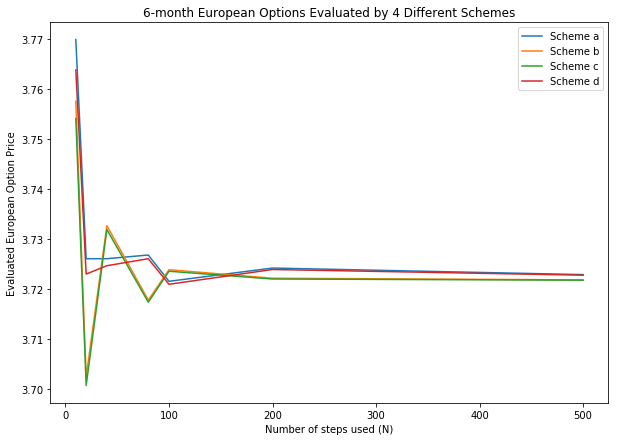

In [711]:
plt.figure(figsize=(10,7))

plt.plot(*zip(*a), label="Scheme a")
plt.plot(*zip(*b), label = "Scheme b")
plt.plot(*zip(*c), label = "Scheme c")
plt.plot(*zip(*d), label = "Scheme d")
plt.title("6-month European Options Evaluated by 4 Different Schemes")
plt.xlabel("Number of steps used (N)")
plt.ylabel("Evaluated European Option Price")
plt.legend()
plt.show()

## Question 2

Take the current price of GOOG. Use risk-free rate of 2% per annum, and strike price that is the closest
integer (divisible by 10) to 110% of the current price. Estimate the price of the call option that expires in
January of next year, using the Binomial Method. GOOG does not pay dividends. To estimate the
historical volatility, use 60 months of historical stock price data on the company. You may use
Bloomberg or finance.yahoo.com to obtain historical prices and the current stock price of GOOG.


**(a) Compare your estimated option price with the one you can get from Bloomberg or finance.yahoo.com
and comment**

**Solution:**

Download Google's 60-month historical prices until January 20, 2018 (Since the only option that matures in January 2019 is on January 20). Estimate the historical volitality and use it as the volitality in the binomial model

In [712]:
# Set the date range to be Google's last 60 months price
start_date = '2013-01-19'
end_date = '2018-01-19'

# User pandas_reader.data.DataReader to load Google's data (remove empty prices)
GOOGLE_prices = data.DataReader('GOOG', 'quandl', start_date, end_date).dropna(axis=1, how='all')

Estimate historical volitality of Google's stock return of adjusted close price

In [713]:
GOOGLE_returns = GOOGLE_prices['AdjClose'] / GOOGLE_prices['AdjClose'].shift(1) - 1
GOOGLE_sd_daily = np.std(GOOGLE_returns)

Convert the Google's daily volatility to annual terms by multiply the daily volitality by $\sqrt{252}$

In [714]:
GOOGLE_sd = GOOGLE_sd_daily * np.sqrt(252)

Build binomial model to estimate the price of a 1-year European Option. The following parameters are chosen, 

$u = e^{(r - \frac{1}{2}\sigma^2)\Delta + \sigma\sqrt{\Delta}} $, $d = e^{(r - \frac{1}{2}\sigma^2)\Delta - \sigma\sqrt{\Delta}} $, $p = \frac{1}{2}$ 

$S_0 $ will be the current price of Google (**Assume to be the price of January 19, 2018**), which is , $K = 1.1 \times S_0 $, $T = 1$, $n = 365$

In [715]:
def EuropeanCallOption(r, sd, S0, T, K, n):
    
    # find u, d and p, using JR scheme
    dt = T/n
    u = m.exp((r - 0.5*sd**2)*dt + sd*m.sqrt(dt))
    d = m.exp((r - 0.5*sd**2)*dt - sd*m.sqrt(dt))
    p = (m.exp(r*dt) - d)/ (u - d)
    
    dt = T/n
    # build stock tree and payoff tree
    S_binomial = stockBinomial(u, d, S0, n)
    
    # initialize payoffs
    payoffs = np.maximum(S_binomial - K, 0)

    # find the call option value  
    for i in range(n):
        payoffs = (payoffs[:-1] * p + payoffs[1:] * (1 - p))/(m.exp(r*dt))
            
    return payoffs[0]

Estimate the 1-year European call option using binomial model with the parameters above

In [716]:
# Define parameters
r = 0.02
T = 1
n = 365
S0 =  round(GOOGLE_prices['AdjClose']['2018-01-19'], 1)[0]
K = (1.1*S0)// 10 * 10

In [717]:
call_1yr = EuropeanCallOption(r, GOOGLE_sd, S0, T, K, n)
print("The estimated price of Google's 1-year call option: $", call_1yr)

The estimated price of Google's 1-year call option: $ 63.7886575123


The market price of the Google's 1-year European Option (maturing on January 20, 2019) with strike price of \$ 1280 (1.1 times current price) is \$ 42.07. The two prices are not close. The reason of this discrapency is probably due to the errors inccured in the estimation of annualized historical volitality. The historical volitality has very little predicting power over of the future volitality of Google's returns, therefore should not be used to build the binomial model

**(b) If the two are different in part (a), find the volatility that would make your estimated price equal to
the market price and comment.**

**Solution:**

The volitality that would make the calculated European Option price close to the market price is the implied volitality, which could be found by trying different volitality values until the calculated stock price is close to the market price. In the below function, C0 represents the market price Google's 1-year option

In [718]:
def implied_volitality_eurocall(r, S0, C0, T, K, n):
    # start with an estimate that is relatively close to the true immplied volitality
    implied_vol = 0.155
    C =  EuropeanCallOption(r, implied_vol, S0, T, K, n)
    while (C0 - C) > 0.1:
        implied_vol += 0.001
        C = EuropeanCallOption(r, implied_vol, S0, T, K, n)
    return round(implied_vol, 4)

In [719]:
vols = np.arange(0.155, 0.16, 0.001)
call_vals = [EuropeanCallOption(r, i, S0, T, K, n) for i in vols]

In [720]:
C0 = 42.07
print("The estimated volitality that makes the two prices reconcile: ", 
      implied_volitality_eurocall(r, S0, C0, T, K, n))


The estimated volitality that makes the two prices reconcile:  0.166


The implied volitality is 16.6%

## Question 3

Consider the following information on the stock of a company and options on it: $S_0 = \$49$, $K = \$50$, $r = 0.03$, $\sigma = 0.2$, $T = 0.3846$(20 weeks), $\mu = 0.14$


Using the Binomial Method (any one of them) estimate the following and draw the graphs:


**(i) Delta of the call option as a function of $S_0$, for $S_0$ ranging from \$20 to \$80, in increments of \$2. **

**Solution:**

initialize parameters

In [721]:
K = 50
sd = 0.25
r = 0.03
T = 0.3846
n = 200
S0_range = list(range(20, 81, 2))

$Delta = \frac{\partial C_t}{\partial S_t} \cong \large\frac{C(S\ + \epsilon,T,\sigma,r,K)\ -\ C(S ,T,\sigma,r,K)}{\epsilon}$

In [722]:
eps = 0.0001
delta_S = [(EuropeanCallOption(r, sd, S0_range[i] + eps, T, K, n) 
          -  EuropeanCallOption(r, sd, S0_range[i], T, K, n)) / eps
         for i in list(range(len(S0_range)))]

**(ii) Delta of the call option, as a function of T (time to expiration), from 0 to 0.3846 in increments of 0.01.**

**Solution:**

initialize parameters

In [723]:
K = 50
sd = 0.25
r = 0.03
T = 0.3846
n = 500
S0 = 49
T_range = np.arange(0.01, 0.39, 0.01)

In [724]:
eps = 0.0001
delta_T = [(EuropeanCallOption(r, sd, S0 + eps, T_range[i], K, n) 
          -  EuropeanCallOption(r, sd, S0, T_range[i], K, n)) / eps
         for i in list(range(len(S0_range)))]

**(iii) Theta of the call option, as a function of $S_0$, for $S_0$ ranging from \$20 to \$80 in increments of \$2.**

**Solution:**

parameters used are same as (i)

$Theta = - \frac{\partial C_t}{\partial \sigma} \large = - \frac{C(S,T+ \epsilon,\sigma ,r,K)\ -\ C(S ,T,\sigma,r,K)\ }{\epsilon}$

In [725]:
eps = 0.0001
theta = [(EuropeanCallOption(r, sd, S0_range[i] , T - eps, K, n) 
          -  EuropeanCallOption(r, sd, S0_range[i], T, K, n)) / eps
         for i in list(range(len(S0_range)))]

**(iv) Gamma of the call option, as a function of $S_0$, for $S_0$ ranging from \$20 to \$80 in increments of \$2.**

**Solution:**

parameters used are same as (i)

$Gamma = \frac{\partial^2 C_t}{\partial S_t^2}\cong \large\frac{C(S+ \epsilon,T,\sigma,r,K)\ -\ 2C(S ,T,\sigma,r,K)\ +\ C(S - \epsilon,T,\sigma,r,K)}{(\epsilon)^2}$

In [726]:
gamma = [(EuropeanCallOption(r, sd, S0 + eps, T_range[i], K, n)
          -  2* EuropeanCallOption(r, sd, S0, T_range[i], K, n)
         + EuropeanCallOption(r, sd, S0 - eps, T_range[i], K, n))/ (eps)**2
         for i in list(range(len(S0_range)))]

**(v) Vega of the call option, as a function of $S_0$, for $S_0$ ranging from \$20 to \$80 in increments of \$2.**

$Vega = \frac{\partial C_t}{\partial \sigma} \large = \frac{C(S,T,\sigma + \epsilon,r,K)\ -\ C(S ,T,\sigma,r,K)\ }{\epsilon}$

In [727]:
eps = 0.0001
vega = [(EuropeanCallOption(r, sd + eps, S0_range[i] , T, K, n) 
          -  EuropeanCallOption(r, sd, S0_range[i], T, K, n)) / eps
         for i in list(range(len(S0_range)))]

** (vi) Rho of the call option, as a function of $S_0$, for $S_0$ ranging from \$20 to \$80 in increments of \$2.**

$Rho =  \frac{\partial C_t}{\partial r} \large = \frac{C(S,T,\sigma ,r + \epsilon,K)\ -\ C(S ,T,\sigma,r,K)\ }{\epsilon}$

In [728]:
eps = 0.0001
rho = [(EuropeanCallOption(r + eps, sd, S0_range[i] , T, K, n) 
          -  EuropeanCallOption(r, sd, S0_range[i], T, K, n)) / eps
         for i in list(range(len(S0_range)))]

Plot greeks as functions of the initial stock price $S_0$ (or time to maturity $T$)

In [729]:
delta_S = list(zip(S0_range, delta_S))
gamma = list(zip(S0_range, gamma))
vega = list(zip(S0_range, vega))
theta = list(zip(S0_range, theta))
rho = list(zip(S0_range, rho))

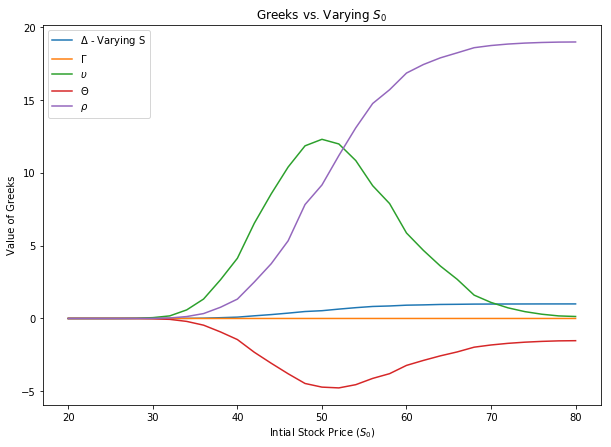

In [730]:
plt.figure(figsize=(10,7))
plt.plot(*zip(*delta_S), label="$\Delta$ - Varying S")
plt.plot(*zip(*gamma), label = "$\Gamma$")
plt.plot(*zip(*vega), label = "$\\upsilon$")
plt.plot(*zip(*theta), label = "$\Theta$")
plt.plot(*zip(*rho), label = "$\\rho$")
plt.xlabel("Intial Stock Price ($S_0$)")
plt.ylabel("Value of Greeks")
plt.title("Greeks vs. Varying $S_0$")
plt.legend()
plt.show()

In [731]:
delta_T = list(zip(T_range, delta_T))

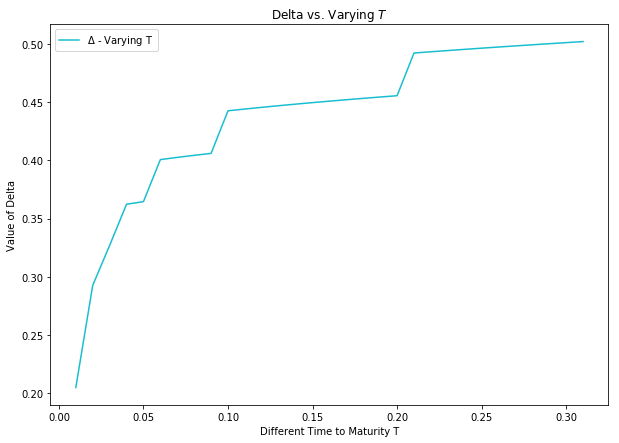

In [732]:
plt.figure(figsize=(10,7))
plt.plot(*zip(*delta_T), label="$\Delta$ - Varying T",color="C9")
plt.title("Delta vs. Varying $T$")
plt.xlabel("Different Time to Maturity T")
plt.ylabel("Value of Delta")
plt.legend()
plt.show()

## Question 4

Consider 12-month put options on a stock of company XYZ. Assume the risk-free rate is 5%/annum and
the volatility of the stock price is 30 % /annum and the strike price of the option is \$100. Use a Binomial
Method to estimate the prices of European and American Put options with current stock prices varying
from \$80 to \$120 in increments of \$4. Draw them all in one graph, compare and comment

**Solution:**

Build both European and American Put option functions

In [733]:
def stockBinomial_am(u, d, S0, n):
    
    stockT = [np.array([S0])] 
    
    for i in range(n):
        current_S = stockT[-1]
        stockt = np.concatenate((current_S*u, [current_S[-1]*d]))
        stockT.append(stockt)
            
    return stockT

In [734]:
def EuropeanPutOption(r, sd, S0, T, K, n):
    
    # find u, d and p
    dt = T/n
    u = m.exp((r - 0.5*sd**2)*dt + sd*m.sqrt(dt))
    d = m.exp((r - 0.5*sd**2)*dt - sd*m.sqrt(dt))
    p = (m.exp(r*dt) - d)/ (u - d)

    # build stock tree and payoff tree
    S_binomial = stockBinomial(u, d, S0, n)
    
    # initialize payoffs
    payoffs = np.maximum(K - S_binomial, 0)

    # find the call option value  
    for i in range(n):
        payoffs = (payoffs[:-1] * p + payoffs[1:] * (1 - p))/(m.exp(r*dt))
            
    return payoffs[0]

In [735]:
def AmericanPutOption(r, sd, S0, T, K, n):
    
    # find u, d and p
    dt = T/n
    u = m.exp((r - 0.5*sd**2)*dt + sd*m.sqrt(dt))
    d = m.exp((r - 0.5*sd**2)*dt - sd*m.sqrt(dt))
    p = (m.exp(r*dt) - d)/ (u - d)
    
    # build stock tree and payoff tree
    S_binomial = stockBinomial_am(u, d, S0, n)
    
    # initialize payoffs
    payoffs = np.maximum(K - S_binomial[-1], 0)

    # find the call option value  
    for i in reversed(range(n)):
        payoffs = np.maximum((payoffs[:-1] * p + payoffs[1:] * (1 - p))/(m.exp(r*dt)), 
                             np.maximum(K - S_binomial[i], 0))
                              
    return payoffs[0]

Initialize parameters

In [736]:
K = 100
sd = 0.3
r = 0.05
n = 120
T = 1
S0_range2 = list(range(80, 121, 4))

Compute European call and American call value

In [737]:
european_call_vals = [EuropeanPutOption(r, sd, S0_range2[i], T, K, n) for i in range(len(S0_range2))]
American_call_vals = [AmericanPutOption(r, sd, S0_range2[i], T, K, n) for i in range(len(S0_range2))]

In [738]:
eurocall = list(zip(S0_range2, european_call_vals))
amcall = list(zip(S0_range2, American_call_vals))

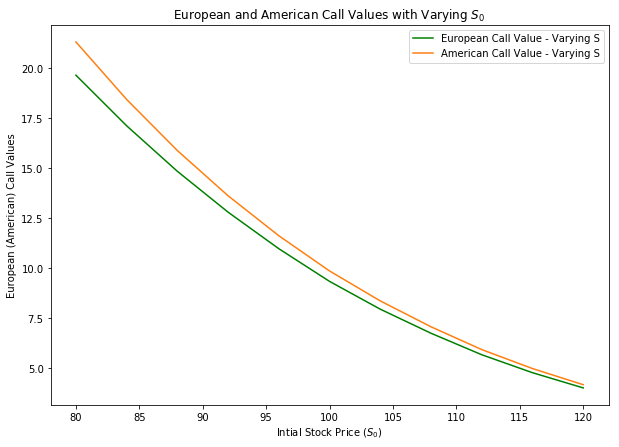

In [739]:
plt.figure(figsize=(10,7))
plt.plot(*zip(*eurocall), label="European Call Value - Varying S", color = 'g')
plt.plot(*zip(*amcall), label="American Call Value - Varying S", color = 'C1')
plt.title("European and American Call Values with Varying $S_0$")
plt.xlabel("Intial Stock Price ($S_0$)")
plt.ylabel("European (American) Call Values")
plt.legend()
plt.show()

## Question 5

Compare the convergence rates of the two methods below by doing the following:
Use the Trinomial Method to price a 6-month European Call option with the following information: the
risk-free interest rate is 5% per annum and the volatility is 24%/annum, the current stock price is \$32 and
the strike price is \$30. Divide the time interval into 𝑛 parts to estimate the price of this option. Use n =
10, 15, 20, 40, 70, 80, 100, 200 and 500 to compute the approximate price and draw them in one graph,
where the horizontal axis measures n, and the vertical one measures the price of the option. The methods
are:

(a) Use the trinomial method applied to the stock price-process ($S_t$) in which 

$u = \frac{1}{d}$, $d = e^{-\sigma\sqrt{3\Delta}}$, $p_d = \frac{r\Delta(1 - u) + (r\Delta)^2 + \sigma^2\Delta}{(u-d)(1-d)}$ ,
$p_u = \frac{r\Delta(1 - d) + (r\Delta)^2 + \sigma^2\Delta}{(u-d)(u-1)}$, $p_m = 1 - p_u - p_d$

**Solution:**



Build the trinomial tree and return the last period stock prices

In [740]:
def stockTrinomial(r, u, d, mid, S0, T, n):

    stockT = [np.array([S0])] 
    
    for i in range(n):
        current_S = stockT[-1]
        stockt = np.concatenate((current_S*u, [current_S[-1]*mid,
                                               current_S[-1]*d]))
        stockT.append(stockt)
                                
    return stockT[-1]  

Build a function that evaluates the European option with trinomial tree

In [741]:
def EuropeanTrinomial_S(r, sd, S0, T, K, n):
    
    dt = T/n
    
    # up, down and middle
    d = m.exp(-sd*m.sqrt(3*dt))
    u = 1/d
    mid = 1

    # find risk-neutral probability, pu, pd, pm
    pu = (r*dt*(1-d) + (r*dt)**2 + sd**2 *dt)/((u - d)*(u - 1))
    pd = (r*dt*(1-u) + (r*dt)**2 + sd**2 *dt)/((u - d)*(1 - d))
    pm = 1 - pu - pd
    
    # Find last period stock price 
    S_trinomial =  stockTrinomial(r, u, d, mid, S0, T, n)
    
    # initialize payoffs
    payoffs = np.maximum(S_trinomial - K, 0)

    # find the call option value  
    for i in range(n):
        payoffs = (payoffs[:-2] * pu + payoffs[1:-1] * pm + payoffs[2:] * pd)/(m.exp(r*dt))
    
    return payoffs[0]
    

initialize parameters

In [742]:
T = 1/2
sd = 0.24
r = 0.05
S0 = 32
K =  30
N = [10, 15, 20, 40, 70, 80, 100, 200, 500]

Find the european call option values with trinomial tree for varying number of steps

In [743]:
calls_trinomial_S = [EuropeanTrinomial_S(r, sd, S0, T, K, i) for i in N]

(b) Use the trinomial method applied to the Log-stock price-process ($X_t$) in which 

$\Delta X_u = \sigma\sqrt{3\Delta}$, $\Delta X_u = -\sigma\sqrt{3\Delta}$, $p_u = \frac{1}{2}\bigg(\frac{\sigma^2\Delta +\big(r−\frac{\sigma^2}{2}\big)^2 \Delta^2}{\Delta X_u ^2} + \frac{(r−\frac{\sigma^2}{2}) \Delta}{\Delta X_u}\bigg)$, $p_d = \frac{1}{2}\bigg(\frac{\sigma^2\Delta +\big(r−\frac{\sigma^2}{2}\big)^2 \Delta^2}{\Delta X_u ^2} - \frac{(r−\frac{\sigma^2}{2}) \Delta}{\Delta X_u}\bigg)$, $P_m = 1 - P_m - P_d$

**Solution:**

Build a function of log price using trinomial tree

In [744]:
def logStockTrinomial(r, dXu, dXd, dXm, X0, T, n):

    log_stockT = [np.array([X0])] 
    
    
    for i in range(n):
        current_X = log_stockT[-1]
        
        log_stockt = np.concatenate((current_X + dXu, 
                                     [current_X[-1] + dXm, current_X[-1] + dXd]))

        log_stockT.append(log_stockt)
                                
    return log_stockT[-1]  

In [745]:
def EuropeanTrinomial_logS(r, sd, S0, T, K, n):
    
    dt = T/n
    X0 = m.log(S0)
    
    # up, down and middle
    dXu = sd*m.sqrt(3*dt)
    dXd = -sd*m.sqrt(3*dt)
    dXm = 0

    # find risk-neutral probability, pu, pd, pm
    pu = (1/2)*(((r - 0.5*sd**2)**2 *(dt)**2 + sd**2 *dt)/(dXu)**2 + ((r - 0.5*sd**2)*dt)/dXu)
    pd = (1/2)*(((r - 0.5*sd**2)**2 *(dt)**2 + sd**2 *dt)/(dXu)**2 - ((r - 0.5*sd**2)*dt)/dXu)
    pm = 1 - pu - pd
    
    # Find last period stock price 
    logS_trinomial =  logStockTrinomial(r, dXu, dXd, dXm, X0, T, n)
    
    # initialize payoffs
    payoffs = np.maximum(np.exp(logS_trinomial) - K, 0)

    # find the call option value  
    for i in range(n):
        payoffs = (payoffs[:-2] * pu + payoffs[1:-1] * pm + payoffs[2:] * pd)/(m.exp(r*dt))
    
    return payoffs[0]

In [746]:
calls_trinomial_logS = [EuropeanTrinomial_logS(r, sd, S0, T, K, i) for i in N]

Plot the evaluated option price with the above two schemes

In [747]:
calls_trinomial_S = zip(N, calls_trinomial_S)
calls_trinomial_logS = zip(N, calls_trinomial_logS)

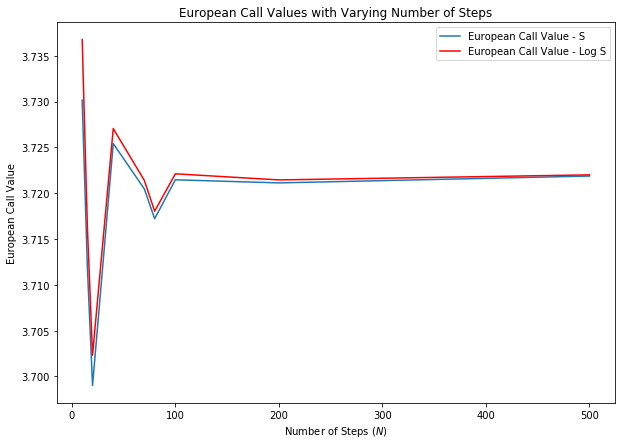

In [748]:
plt.figure(figsize=(10,7))
plt.plot(*zip(*calls_trinomial_S), label="European Call Value - S", color = 'C0')
plt.plot(*zip(*calls_trinomial_logS), label="European Call Value - Log S", color = 'r')
plt.title("European Call Values with Varying Number of Steps")
plt.xlabel("Number of Steps ($N$)")
plt.ylabel("European Call Value")
plt.legend()
plt.show()

## Question 6

Use Halton’s Low-Discrepancy Sequences to price European call options. The code should be generic: it
will ask for the user inputs for $S_0$, K, T, r, $\sigma$, $N$ (number of points) and $b_1$ (base 1) and $b_2$ (base 2). Use
the Box-Muller method to generate Normals such as:

$$\begin{equation*}
       \begin{cases}
            Z_1 = \sqrt{-2 ln(H_1)} cos(2\pi H_2)\\
            Z_2 = \sqrt{-2 ln(H_1)} sin(2\pi H_2)\\
         \end{cases}
\end{equation*}$$


where $H_1$ and $H_2$ will be the Halton’s numbers with base $b_1$ and base $b_2$ accordingly.

For the price of the call option you may use the following formula:

$$C = E\big[f(W_T)\big] = e^{-rT} E\bigg(max(S_0 e^{\sigma W_T + ( r − \frac{ 1 }{ 2 } \sigma^2)T} - K, 0)\bigg)$$

**Solution:**

Start with generating the Halton Sequence

In [749]:
def Halton_1D(size, base):
    sequence = []
    for i in range(size + 1):
        k, m = 0., 1.
        while i > 0:
            i, a = (i // base, i % base)
            m *= base
            k += a / m
        sequence.append(k)
    return sequence

In [750]:
def Halton_2D(size, b1, b2):
    
    halton_x = Halton_1D(size, b1)[1:]
    halton_y = Halton_1D(size, b2)[1:]

    return halton_x, halton_y 

Generate a Halton sequence and use them to generate independent random normal samples with given size and bases. Use Box-Muller Algorithm

In [751]:
def normals_from_Halton(size, b1, b2):
    
    # Generate Halton Sequence and use them as uniform random samples
    U1, U2 = Halton_2D(size//2, b1, b2)
    # Generate random normal samples with Box-Muller Algorithm
    Z1 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.cos(2*m.pi*u2), U1, U2))
    Z2 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.sin(2*m.pi*u2), U1, U2))
    
    return np.asarray(Z1 + Z2)

Use the generated normal to evaluate the call option via Monte Carlo Simulation

In [752]:
def EuropeanCallHalton(r, sd, S0, T, K, n, b1, b2):
    
    # generate normal from Halton Sequence
    Zt = normals_from_Halton(n, b1, b2)
    # Simulate Stock prices at time T
    ST = S0*np.exp((r - 0.5*sd**2)*T + sd*np.sqrt(T)*Zt)
    
    # Find call option value
    payoffs = np.maximum(ST - K, 0)
    
    C = m.exp(-r*T)* np.mean(payoffs)
    
    return C

Use this function to evaluate the same option in question 1 and 5,

a 6-month European Call option with the following information: the risk-free interest rate is 5% per annum and the volatility is 24%/annum, the current stock price is \$ 32 and the strike price is \$30. The result should be really close to the value calculated by binomial and trinomial tree.

In [753]:
# Define parameters
r = 0.05
sd = 0.24
S0 = 32
K = 30
T = 0.5
n = 1000
b1 = 2
b2 = 7

In [754]:
print("The price of the European Call option found by Halton Sequence: $", EuropeanCallHalton(r, sd, S0, T, K, n, b1, b2))

The price of the European Call option found by Halton Sequence: $ 3.73656498443


The Halton evaluated European option is very close to the value evaluated by binomial tree and trinomial tree method, which is $3.73